# Estatística com Python - Aula 1: Entendendo os dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('base.csv')

In [3]:
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


In [4]:
# verificando a quantidade de linhas e colunas
df.shape

(200000, 10)

In [5]:
# verificando os tipos de dados e se há valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_compra          200000 non-null  object 
 1   sexo_biologico     200000 non-null  object 
 2   idade_cliente      200000 non-null  int64  
 3   regiao_cliente     200000 non-null  object 
 4   categoria_produto  200000 non-null  object 
 5   preco_unitario     200000 non-null  float64
 6   quantidade         200000 non-null  int64  
 7   total_compra       200000 non-null  float64
 8   tempo_entrega      200000 non-null  int64  
 9   avaliacao          200000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.3+ MB


**O valor: non-null indica que não há valores nulos. Se houvesse a quantidade de linhas retornadas para aquela coluna seria menor do que o total porque os valores nulos não são contados**

In [6]:
# verificando todas as categorias de produtos existentes de forma única no e-commerce
df['categoria_produto'].unique()

array(['Ferramentas e Construção', 'Alimentos e Bebidas', 'Eletrônicos',
       'Papelaria e Escritório', 'Beleza e Cuidados Pessoais',
       'Casa e Mobílias', 'Roupas, Calçados e Acessórios', 'Livros',
       'Brinquedos', 'Esporte e Lazer'], dtype=object)

In [7]:
# verificando quantas categorias de produtos existem de forma única no e-commerce
df['categoria_produto'].unique().size

10

In [8]:
# usando drop_duplicates as duplicatas são removidas e é retornado uma série com os valores únicos
df['categoria_produto'].drop_duplicates()

0          Ferramentas e Construção
1               Alimentos e Bebidas
2                       Eletrônicos
4            Papelaria e Escritório
5        Beleza e Cuidados Pessoais
6                   Casa e Mobílias
8     Roupas, Calçados e Acessórios
11                           Livros
20                       Brinquedos
25                  Esporte e Lazer
Name: categoria_produto, dtype: object

In [9]:
# extraindo as notas da avaliação de forma única
df['avaliacao'].unique()

array([1, 4, 5, 3, 2])

In [10]:
# ordenando as notas das avaliações
sorted(df['avaliacao'].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

## Criando variáveis categóricas com Pandas

Método ensinado pela professora

In [11]:
# criando variáveis categóricas com o pandas
df['avaliacao_indicador'] = pd.Categorical(df['avaliacao'], categories=[1, 2, 3, 4, 5], ordered=True)

# dicionário com chave (avaliacao) e valor (categoria)
avaliacao_labels =  {1: 'Péssimo', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Ótimo'}

# mapeando os valores
df['avaliacao_indicador'] = df['avaliacao_indicador'].map(avaliacao_labels)

In [12]:
# verificando se o mapeamento foi feito de forma correta
df[['avaliacao', 'avaliacao_indicador']].drop_duplicates()

,avaliacao,avaliacao_indicador
0,1,Péssimo
1,4,Bom
2,5,Ótimo
8,3,Regular
14,2,Ruim


In [13]:
# exibindo o dataframe com a nova coluna de avaliacao_indicador
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao_indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


## Criando variáveis categóricas com Pandas

Método ensinado pelo ChatGPT

In [14]:
# df['avaliacao_indicador'] = (
#     pd.Categorical(
#         df['avaliacao'],
#         categories=[1, 2, 3, 4, 5],
#         ordered=True
#     )
#     .rename_categories(['Péssimo', 'Ruim', 'Regular', 'Bom', 'Ótimo'])
# )

# df.head()

## Analisando as variáveis quantitivas discretas e contínuas

In [15]:
# extraindo os valores da quantidade de vendas de forma única
df['quantidade'].unique()

array([ 2,  1,  8,  5,  3,  7,  6,  4, 10,  9])

In [16]:
# buscando a maior quantidade vendida
df['quantidade'].max()

np.int64(10)

In [17]:
# buscando a menor quantidade vendida
df['quantidade'].min()

np.int64(1)

In [18]:
# buscando o maior valor de compra
df['total_compra'].max()

np.float64(20744.7)

In [19]:
# buscando o menor valor de compra
df['total_compra'].min()

np.float64(5.05)

## Identificando o perfil do público

**Distribuindo frequências de dados qualitativos - 1 variável**

In [20]:
# ordenando os valores das variáveis em ordem crescente ou decrescente
freq_avaliacoes = (df.groupby('avaliacao_indicador', observed=False)
                   .size()
                   .reset_index(name='freq_absoluta')
                   .sort_values(by='avaliacao_indicador', ascending=False))

In [21]:
freq_avaliacoes

,avaliacao_indicador,freq_absoluta
4,Ótimo,66076
3,Bom,40980
2,Regular,32282
1,Ruim,28239
0,Péssimo,32423


In [22]:
# determinando a frequência de cada valor (frequência relativa)
freq_avaliacoes['freq_relativa'] = round(
    (freq_avaliacoes['freq_absoluta']/freq_avaliacoes['freq_absoluta'].sum()) * 100, 1
)

In [23]:
freq_avaliacoes

,avaliacao_indicador,freq_absoluta,freq_relativa
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


In [27]:
# renomeando colunas
freq_avaliacoes.columns = ['Avaliação', 'Quantidade', 'Porcentagem (%)']

In [28]:
freq_avaliacoes

,Avaliação,Quantidade,Porcentagem (%)
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


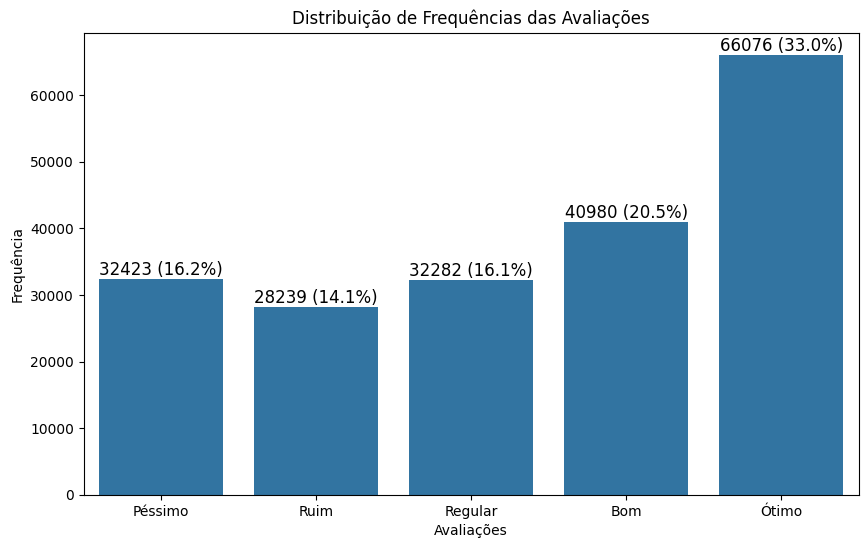

In [26]:
# plotando gráfico de distribuição de frequências
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=freq_avaliacoes, x='Avaliações', y='Quantidade')

# Adicionando título e rótulos aos eixos
plt.title("Distribuição de Frequências das Avaliações")
plt.xlabel("Avaliações")
plt.ylabel("Frequência")


# Adicionando os rótulos com valores de frequência e porcentagem
for index, row in freq_avaliacoes.iterrows():
    plt.text(index, row['Quantidade'] + 0.1, f"{row['Quantidade']} ({row['Porcentagem (%)']:.1f}%)",
             ha='center', va='bottom', fontsize=12)


plt.show()

## Tabela de Contingência (Tabela Cruzada)

**Distribuindo frequências de dados qualitativos - 2 variáveis**

In [29]:
# criando tabela de contingência (tabela cruzada)
tab_avaliacao_regiao = pd.crosstab(df['avaliacao_indicador'], df['regiao_cliente'])

In [30]:
tab_avaliacao_regiao

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao_indicador,,,,,
Péssimo,5005,7880,2757,9838,6943
Ruim,4473,6809,2545,8810,5602
Regular,3587,5701,3811,13454,5729
Bom,7378,11834,3058,11845,6865
Ótimo,11124,17343,5490,20656,11463


In [31]:
# criando tabela de contingência relativa
tab_avaliacao_regiao_relativa = pd.crosstab(df['avaliacao_indicador'], df['regiao_cliente'], normalize='columns')*100

tab_avaliacao_regiao_relativa = round(tab_avaliacao_regiao_relativa,1)

In [32]:
tab_avaliacao_regiao_relativa

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao_indicador,,,,,
Péssimo,15.9,15.9,15.6,15.2,19.0
Ruim,14.2,13.7,14.4,13.6,15.3
Regular,11.4,11.5,21.6,20.8,15.7
Bom,23.4,23.9,17.3,18.3,18.8
Ótimo,35.2,35.0,31.1,32.0,31.3


**Qual região tem mais avaliações positivas?**

In [36]:
tab_avaliacao_regiao_filtrada = tab_avaliacao_regiao_relativa[
    tab_avaliacao_regiao_relativa.index.isin(['Ótimo', 'Bom'])
]

resultado = tab_avaliacao_regiao_filtrada.sum()

In [37]:
resultado

regiao_cliente
Centro-Oeste    58.6
Nordeste        58.9
Norte           48.4
Sudeste         50.3
Sul             50.1
dtype: float64

As regiões Centro-Oeste e Nordeste possuem o maior percentual de avaliações positivas

**Alguma região concentra a maior parte das avaliações negativas?**

In [38]:
tab_avaliacao_negativa_regiao = tab_avaliacao_regiao_relativa[
    tab_avaliacao_regiao_relativa.index.isin(['Péssimo', 'Ruim'])
]

resultado_negativo = tab_avaliacao_negativa_regiao.sum()

resultado_negativo

regiao_cliente
Centro-Oeste    30.1
Nordeste        29.6
Norte           30.0
Sudeste         28.8
Sul             34.3
dtype: float64

A região Sul possui o maior percentual de avaliações negativas, seguida por Centro-Oeste e Norte.

## Cruzando os dados

**Analisando o poder de compra entre homens e mulheres por região**

In [39]:
ticket_medio = pd.crosstab(df['sexo_biologico'], df['regiao_cliente'], values=df['total_compra'], aggfunc='mean')

resultado = round(ticket_medio,2)

resultado

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
sexo_biologico,,,,,
Feminino,1887.12,1861.09,1828.61,2160.82,2176.44
Masculino,2025.24,2005.31,1830.54,1881.08,1871.38
